# Obama's Briefing Topic Analysis


In [1]:
import string;
import nltk
import json
import ast
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import collections


from collections import defaultdict
from boltons.jsonutils import JSONLIterator
from boltons.dictutils import OMD
from lxml.html import soupparser
from lxml.cssselect import CSSSelector

from gensim.models.coherencemodel import CoherenceModel

## Data

Obama’s briefings were found in the whitehouse webpage. We use the data file at github, which is the download from whitehouse homepage, “ https://www.whitehouse.gov/briefings-statements/ ”. The data file can be found at “ https://github.com/mahmoud/briefings “ 
Briefings.jsonl : 1778 Obama’s briefings from 2009 to 2016. 


In [2]:
BRIEFINGS_FILE = '/Users/kim.jiy/documents/springboard/topic/data/briefings/briefings.jsonl'


In [3]:
import string;
import nltk
import json
import ast
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

stemmer = SnowballStemmer("english")


## Data Cleaning and Preparation

Punctuation : punctuation such as “a”, “!” , “?”, ets were removed at each contents of briefings using “string.punctuation” provided from Python

Unicode implementation: To have words encoded using Unicode encoding, I encoded text type to  utf-8 and remove any numbers and also change 
every words to lower cases.  

tokenization : Tokenized every words in contents


In [60]:
# Data Cleaning. From the briefing file , meaningless words are removed and each words are tokenized. 

def makeInputDate(briefing_text):
    
    # remove punctuation
    exclude = set(string.punctuation)
    s = briefing_text
    
    # store words which are not puncuation to "s"
    s = ''.join(ch for ch in s if ch not in exclude)
    
    
    # encode text type to  utf-8 and remove any numbers. also change every words to lower case. 
    s1 = str(s.encode('utf-8')).translate(None, '0123456789').lower()
    
    # store tokenize words to "tokens"
    tokens = nltk.word_tokenize(s1)

    # use "stopwords.words" from nltk package. "stopwords.words" are meaninless words. 
    stop_words = set(stopwords.words('english'))
    
    # "additional_stop_words" is the set of meaningless words which are added from the result of the model. 
    #  After results come out from the mathematical model, "additional_stop_words" is added with the meaningless words from the result
    additional_stop_words = ['presid','mr','say','think','go','well','get','q','said','veri'
                 , 'jame', 'bradi','press','brief','room','pm','est','go','got'
                 , 'ive','g','weve', 'one', 'dont', 'doe', 'de', 'hes','would'
                 ,'ani','also', 'gibb','earnest','carney','robert']

    stop_words.update(additional_stop_words)

    output = []
    
    num_meaning = len(tokens)
    num_meaningless= 0
    # each tokenized words are meaningless words, which are included in "stop_words" or "additional_stop_words", i is not 0. 
    for token in tokens:
        

        # removing morphological affixes
        try:
            stemms = stemmer.stem(token);

        except UnicodeDecodeError:
            stemms = "UnicodeDecodeError";

        i = 0;
        
        
        
        # check if word is in the set of meaningless words, "stop_words". 

        try:
            if stemms in stop_words:
                i += 1
                num_meaningless +=1;
            elif stemms in additional_stop_words:
                i += 1
                num_meaningless +=1;

        except UnicodeDecodeError:
                i += 1
                num_meaningless +=1;

        try:
            if i == 0 and stemms != "UnicodeDecodeError":
                output.append(str(stemms.encode('utf8')))
        except UnicodeDecodeError:
            i += 1




    return output, num_meaningless , num_meaning;

Gather list of meaningful words to "description"

In [61]:
from datetime import datetime

jsonl_iter = JSONLIterator(open(BRIEFINGS_FILE))

stemmer = SnowballStemmer("english")
res = defaultdict(list)
nums = 0;
descriptions = []
topic_year = []

for obj in jsonl_iter:

    title = obj['title']
    briefing_html = obj['content']
    date = obj['date']
    date_year = date[-4:]
    #print title
    d_format = datetime.strptime(date, '%B %d, %Y')
    month = d_format.month
    cur_date = str(date_year)+ "-" + str(d_format.month)
    
     # parse html
    content_tree = soupparser.fromstring(briefing_html)
    pane_tree = content_tree.cssselect('.pane-node-field-forall-body')
    briefing_text = pane_tree[0].text_content()
    
    # store meaningful words from briefings to "descriptions"
    descriptions.append(makeInputDate(briefing_text)[0])
    topic_year.append(cur_date)
    nums += 1;



There are 1778 breifings in total

In [6]:
# Let's check how many brefings in total.

print(nums)

1778


## Data Storytelling

Let's check how many words in each briefings. 

In [7]:
# the number of words before removing punctuation 

print( np.mean(num_mean), np.amin(num_mean), np.amax(num_mean))

(7016.9325084364455, 101, 24271)


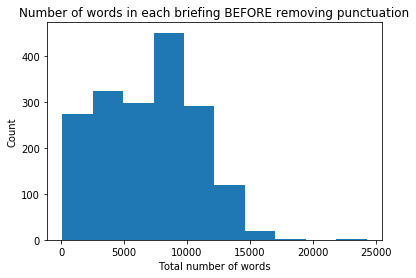

In [8]:

plt.hist(num_mean)
plt.title("Number of words in each briefing BEFORE removing punctuation")
plt.xlabel("Total number of words")
plt.ylabel("Count")
plt.show()

In [9]:
# # the number of words before removing punctuation after removing punctuation

words = np.subtract(num_mean,num_meanless)
print( np.mean(words), np.amin(words), np.amax(words))

(3207.115298087739, 62, 10929)


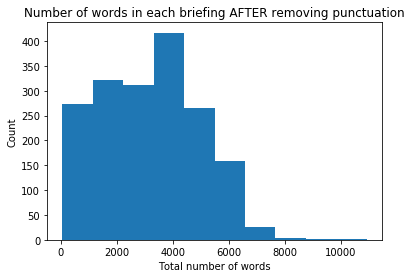

In [10]:

plt.hist(words)
plt.title("Number of words in each briefing AFTER removing punctuation")
plt.xlabel("Total number of words")
plt.ylabel("Count")
plt.show()

In [11]:
uniq_nums = []
for desc in descriptions:
    for word in desc:
        uniq_nums.append(word)

ctr = collections.Counter(uniq_nums)

In [26]:
descriptions[0]

(['afternoon',
  'everybodi',
  'friday',
  'last',
  'time',
  'th',
  'good',
  'luck',
  'let',
  'quick',
  'announc',
  'befor',
  'question',
  'white',
  'hous',
  'host',
  'transit',
  'exercis',
  'current',
  'perspect',
  'cabinet',
  'member',
  'agenc',
  'head',
  'senior',
  'white',
  'hous',
  'offici',
  'exercis',
  'provid',
  'opportun',
  'familiar',
  'member',
  'identifi',
  'presidentelect',
  'fill',
  'senior',
  'administr',
  'posit',
  'author',
  'polici',
  'coordin',
  'structur',
  'administr',
  'use',
  'respond',
  'major',
  'domest',
  'incid',
  'member',
  'agenc',
  'head',
  'advisor',
  'current',
  'administr',
  'share',
  'experi',
  'lesson',
  'incid',
  'respons',
  'led',
  'discuss',
  'number',
  'respons',
  'scenario',
  'togeth',
  'exercis',
  'announc',
  'back',
  'novemb',
  'advanc',
  'goal',
  'conduct',
  'profession',
  'seamless',
  'transit',
  'possibl',
  'posit',
  'provid',
  'addit',
  'detail',
  'conclus',
  'm

## Machine Learning


First, I constructed a mapping table to efficeintly use values to models. Then, it was converted into a bag-of-words. As a result, we have frequency table of each words. 


In [6]:
from gensim import corpora, models, similarities
import logging, gensim, bz2


# Construct ID mapping table to  map tokens to IDs 
dictionary = corpora.Dictionary(descriptions)
type(dictionary.token2id)

## converts dictionary into a bag-of-words. 
raw_corpus2 = [dictionary.doc2bow(t) for t in descriptions]



### LDA

This is one of the most popular topic modeling algorithms today. It is a generative model in that it assumes each document is a mixture of topics and in turn, each topic is a mixture of words. 

In [7]:
lda = gensim.models.ldamodel.LdaModel(corpus=raw_corpus2, id2word=dictionary, num_topics=23, update_every=1, chunksize=50, passes=1)
print_lda = lda.print_topics(23)


top_topic = [sorted(lda.get_document_topics(i), key=lambda x: -x[1])[0][0] for i in raw_corpus2]



In [17]:
test= lda.get_document_topics(raw_corpus2[0])

{'2009-1': [6, 1.0, 0.20155115922292074],
 '2009-10': [16, 0.7619047619047619, 0.06694775074720383],
 '2009-11': [12, 0.8, 0.07723066707452138],
 '2009-12': [10, 0.8333333333333334, 0.09075935482978821],
 '2009-2': [25, 1.0, 0.19343137741088867],
 '2009-3': [26, 1.0, 0.19702887535095215],
 '2009-4': [22, 0.6875, 0.09687996994365346],
 '2009-5': [25, 0.8333333333333334, 0.15601423263549805],
 '2009-6': [19, 0.95, 0.11584692252309699],
 '2009-7': [22, 0.8461538461538461, 0.08110917698253285],
 '2009-8': [17, 0.7727272727272727, 0.07186307626612046],
 '2009-9': [14, 0.6086956521739131, 0.06399693659373693],
 '2010-1': [15, 0.6818181818181818, 0.1117663860321045],
 '2010-10': [13, 0.9285714285714286, 0.05994403820771437],
 '2010-11': [12, 0.8571428571428571, 0.18408403793970743],
 '2010-12': [11, 0.8461538461538461, 0.2576274655082009],
 '2010-2': [15, 0.9375, 0.24126796722412108],
 '2010-3': [13, 0.9285714285714286, 0.0772014672939594],
 '2010-4': [13, 0.5652173913043478, 0.08629963948176

In [53]:
lda.print_topics(23)

[(0,
  u'0.020*"senat" + 0.013*"robert" + 0.012*"talk" + 0.010*"look" + 0.010*"peopl" + 0.009*"like" + 0.009*"know" + 0.009*"laughter" + 0.009*"mean" + 0.008*"time"'),
 (1,
  u'0.042*"el" + 0.033*"napolitano" + 0.022*"email" + 0.013*"dalai" + 0.012*"lama" + 0.010*"con" + 0.008*"hondura" + 0.008*"pete" + 0.007*"shanghai" + 0.006*"secretari"'),
 (2,
  u'0.021*"afghanistan" + 0.012*"secur" + 0.012*"troop" + 0.012*"forc" + 0.010*"iraq" + 0.008*"afghan" + 0.008*"militari" + 0.008*"us" + 0.006*"pakistan" + 0.006*"strategi"'),
 (3,
  u'0.011*"lender" + 0.008*"banker" + 0.006*"like" + 0.006*"tri" + 0.005*"want" + 0.005*"know" + 0.005*"thing" + 0.005*"lugar" + 0.005*"make" + 0.005*"hous"'),
 (4,
  u'0.012*"peopl" + 0.008*"know" + 0.008*"talk" + 0.008*"polici" + 0.008*"chang" + 0.008*"cuban" + 0.007*"cuba" + 0.007*"robert" + 0.007*"state" + 0.006*"administr"'),
 (5,
  u'0.018*"know" + 0.009*"hous" + 0.009*"talk" + 0.008*"believ" + 0.008*"white" + 0.008*"obvious" + 0.007*"today" + 0.007*"work" + 

In [8]:
import pandas as pd

d = {'Y': topic_year, 'topic': top_topic}

# df 가 내가 부탁했던 것.. year month 를  top topic 별로 구분한것
df = pd.DataFrame(data=d)


grouped_df  = df.groupby(['Y', 'topic']).size().reset_index(name='counts')


max_cnt = grouped_df.groupby(['Y'], sort=False)['counts'].max().reset_index(name='counts')

final = pd.merge(grouped_df, max_cnt, on=['Y','counts'])

In [14]:
final

,Y,topic,counts
0,2009-1,14,2
1,2009-1,22,2
2,2009-10,5,10
3,2009-11,11,5
4,2009-12,20,3
5,2009-2,14,11
6,2009-3,22,9
7,2009-4,11,9
8,2009-5,15,7
9,2009-6,13,7


In [11]:
ss= "2017-"
print ss[:4]

2017


In [13]:
## 연도별로 top
year_2009_output = []
year_2010_output = []
year_2011_output = []
year_2012_output = []
year_2013_output = []
year_2014_output = []
year_2015_output = []
year_2016_output = []
year_2017_output = []
for i in range(0, len(topic_year)):
    
    if topic_year[i][:4] == "2009" :
        year_2009_output.append(top_topic[i] )
    elif topic_year[i][:4] == "2010" :
        year_2010_output.append(top_topic[i] )
    elif topic_year[i][:4] == "2011" :
        year_2011_output.append(top_topic[i] )
    elif topic_year[i][:4] == "2012" :
        year_2012_output.append(top_topic[i])
    elif topic_year[i][:4] == "2013" :
        year_2013_output.append(top_topic[i])
    elif topic_year[i][:4] == "2014" :
        year_2014_output.append(top_topic[i])
    elif topic_year[i][:4] == "2015" :
        year_2015_output.append(top_topic[i])
    elif topic_year[i][:4] == "2016" :
        year_2016_output.append(top_topic[i])
    elif topic_year[i][:4] == "2017" :
        year_2017_output.append(top_topic[i])

from collections import Counter

print "2009: " + str(Counter(year_2009_output))
print "2010: " + str(Counter(year_2010_output))
print "2011: " + str(Counter(year_2011_output))
print "2012: " + str(Counter(year_2012_output))
print "2013: " + str(Counter(year_2013_output))
print "2014: " + str(Counter(year_2014_output))
print "2015: " + str(Counter(year_2015_output))
print "2016: " + str(Counter(year_2016_output))
print "2017: " + str(Counter(year_2017_output))


2009: Counter({13: 42, 14: 39, 5: 35, 11: 30, 22: 30, 15: 16, 2: 15, 0: 14, 17: 13, 21: 7, 4: 3, 18: 3, 19: 3, 20: 3, 7: 2, 8: 2, 12: 1})
2010: Counter({5: 46, 0: 32, 22: 21, 14: 20, 17: 15, 2: 14, 11: 14, 13: 11, 19: 10, 20: 6, 15: 5, 21: 5, 18: 4, 16: 2})
2011: Counter({22: 69, 19: 35, 11: 26, 10: 25, 2: 19, 14: 16, 5: 12, 17: 10, 20: 7, 21: 4, 15: 3, 0: 2, 18: 1})
2012: Counter({22: 71, 14: 67, 5: 17, 2: 15, 15: 11, 11: 10, 17: 9, 7: 7, 10: 4, 20: 3, 0: 2, 8: 2, 13: 2, 18: 2, 19: 2, 4: 1, 6: 1, 16: 1, 21: 1})
2013: Counter({19: 51, 13: 32, 22: 29, 15: 20, 5: 15, 10: 14, 17: 13, 11: 9, 14: 8, 20: 4, 2: 3, 0: 2, 7: 2, 8: 1})
2014: Counter({2: 40, 8: 38, 19: 27, 5: 20, 15: 18, 11: 15, 18: 14, 14: 12, 22: 11, 17: 6, 13: 5, 10: 4, 0: 3, 7: 3, 20: 2, 4: 1})
2015: Counter({19: 45, 5: 32, 2: 28, 7: 19, 10: 16, 20: 15, 11: 14, 15: 11, 17: 6, 4: 4, 8: 4, 14: 4, 22: 3, 0: 1, 6: 1, 13: 1, 18: 1, 21: 1})
2016: Counter({0: 34, 10: 29, 5: 25, 11: 25, 2: 17, 15: 12, 19: 12, 17: 11, 14: 10, 22: 9, 2

In [44]:
# the function to find the portion , frequence, average of probability for each topic, "topic_id"
def picks(topic_id, raw_corpus, list_date, lda_model):
    output = {}
    
    for i in range(0,len(raw_corpus)):
        list_topics= lda_model.get_document_topics(raw_corpus[i])
        for j in list_topics:
            if j[0] == topic_id:
                if list_date[i] in output:
                    output[list_date[i]] = [output[list_date[i]][0]  + 1, output[list_date[i]][1] + j[1]]
                else:
                    output[list_date[i]] = [1,j[1]]
                break
    
    for i in output.keys():
       total_cnt = list_date.count(i) 
       output[i] = [output[i][0], output[i][0]*1.0/total_cnt, output[i][1]/output[i][0]] 
    return output

Let's check how the occupancy of the first top topic changes each month.  

In [65]:
topic_1 =  picks(22, raw_corpus2, topic_year, lda)

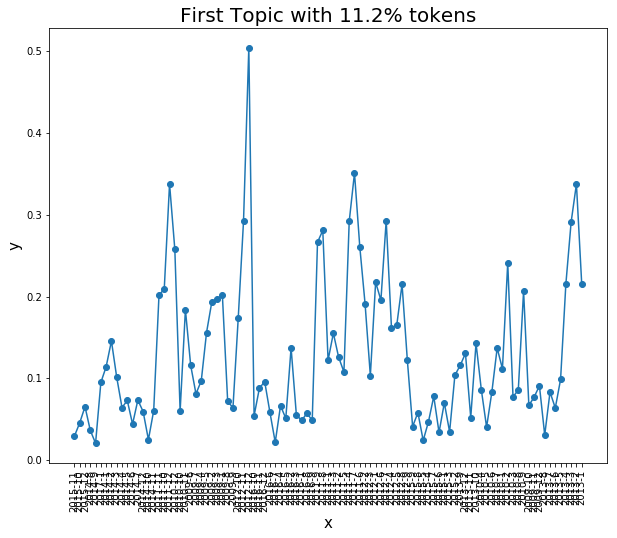

In [79]:


%matplotlib inline
import random
import sys
import array
import matplotlib.pyplot as plt


# repackage data into array-like 
graph_1 = {"x":[], "y":[], }
for label, coord in topic_1.items():
    graph_1["y"].append(coord[2])
    graph_1["x"].append(label)

# display scatter plot data
plt.figure(figsize=(10,8))
plt.title('First Topic with 11.2% tokens', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(rotation=90)
plt.plot(graph_1["x"], graph_1["y"], marker = 'o')



Let's check how the occupancy of the second top topic changes each month.  

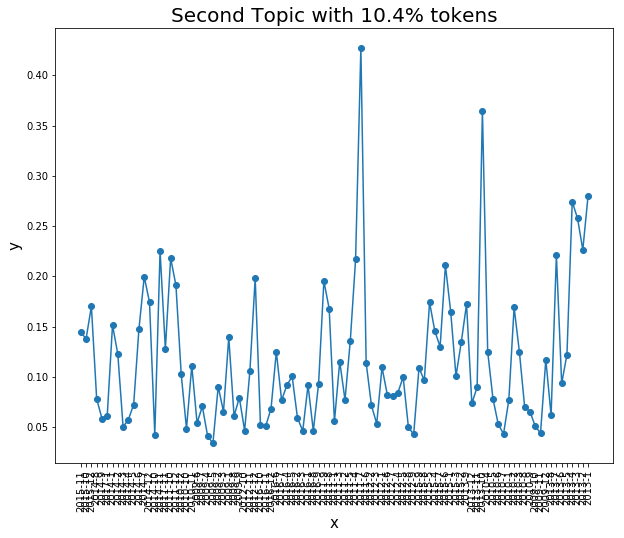

In [80]:
topic_2 =  picks(19, raw_corpus2, topic_year, lda)

graph_2 = {"x":[], "y":[], }
for label, coord in topic_2.items():
    graph_2["y"].append(coord[2])
    graph_2["x"].append(label)

# display  plot data
plt.figure(figsize=(10,8))
plt.title('Second Topic with 10.4% tokens', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(rotation=90)
plt.plot(graph_2["x"], graph_2["y"], marker = 'o')



Let's check how the occupancy of the third top topic changes each month.  

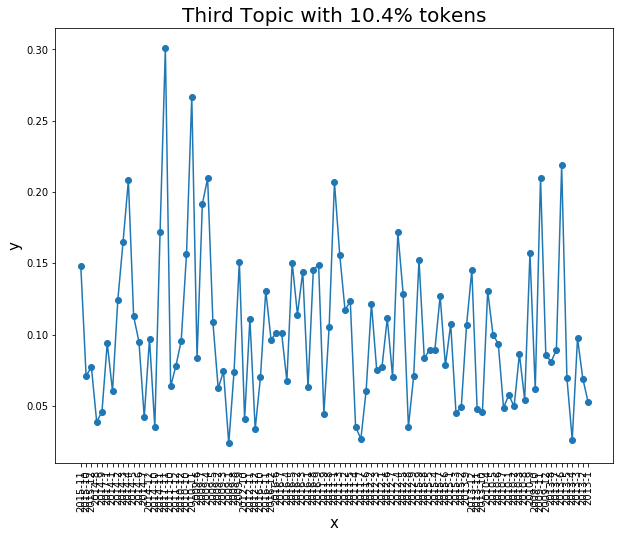

In [81]:
topic_3 =  picks(11, raw_corpus2, topic_year, lda)

graph_3 = {"x":[], "y":[], }
for label, coord in topic_3.items():
    graph_3["y"].append(coord[2])
    graph_3["x"].append(label)

# display  plot data
plt.figure(figsize=(10,8))
plt.title('Third Topic with 10.4% tokens', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(rotation=90)
plt.plot(graph_3["x"], graph_3["y"], marker = 'o')




Let's draw all 3 topics on the same graph. 

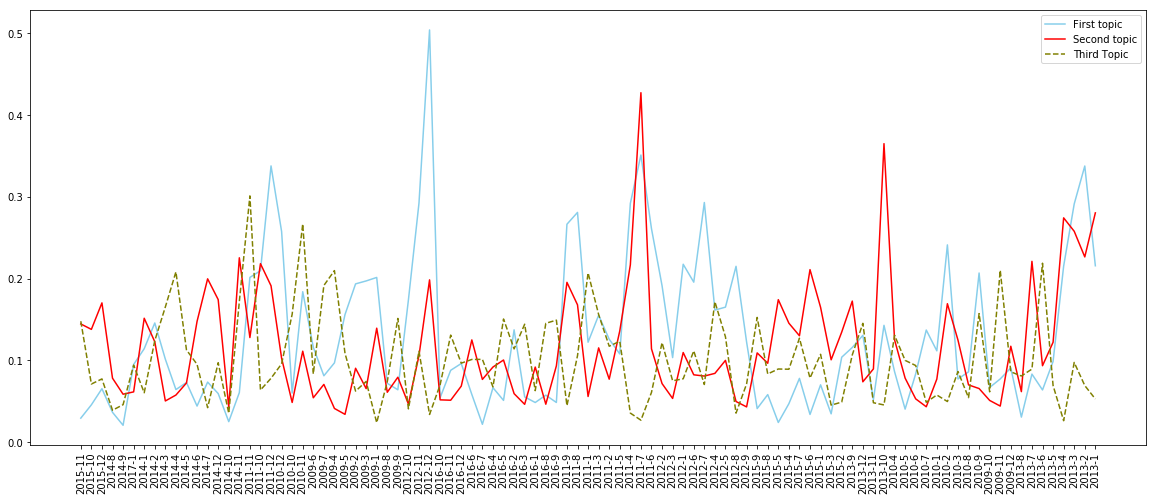

In [89]:
plt.figure(figsize=(20,8))
plt.plot( 'x', 'y', data=graph_1, marker='', color='skyblue',label = "First topic")
plt.plot( 'x', 'y', data=graph_2, marker='', color='red', label = "Second topic")
plt.plot( 'x', 'y', data=graph_3, marker='', color='olive',  linestyle='dashed', label="Third Topic")
plt.xticks(rotation=90)
plt.legend()

### Parameter tuning for LDA

LDA require a num_topics parameter (set to 200 by default) to determine the number of latent dimensions after the SVD. So several numbers of topics were tested on the model to pick the best one. Coherence socre was used to measure the model. Topic coherence measures the human interpretability of a topic model. Topic coherence evaluates topic models how models are interpretable using wikipedia or wordnet. Thus this can be used to compare different topic models. 

In [34]:
# number of topics were tried to find the optimal number of topics

num_topic = [12, 15, 17, 19 , 21, 23, 35]
cohere_list = []
for i in num_topic:
    cur_lda = gensim.models.ldamodel.LdaModel(corpus=raw_corpus2, id2word=dictionary, num_topics=i, update_every=1, chunksize=50, passes=1)
    cm = CoherenceModel(model=cur_lda, texts=descriptions, dictionary=dictionary, coherence='c_v')
    cohere_list.append(cm.get_coherence())

cohere_list

[0.3391011535873207,
 0.32037807236786026,
 0.3535696288956538,
 0.36486564704087915,
 0.38258499273630797,
 0.31839021008601753,
 0.4131044072166725]

The best model was with the number of topics of 23 from the graph below. 

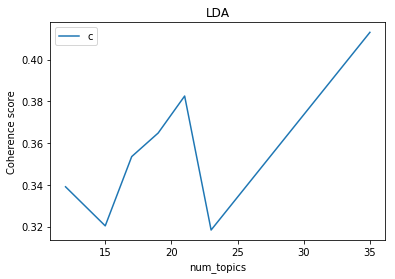

In [35]:
plt.plot(num_topic, cohere_list)
plt.title("LDA")
plt.xlabel("num_topics")
plt.ylabel("Coherence score")
plt.legend(("c_v"), loc='best')
plt.show()

In [36]:
# The optimal model with 23 topics
lda = gensim.models.ldamodel.LdaModel(corpus=raw_corpus2, id2word=dictionary, num_topics=23, update_every=1, chunksize=50, passes=1)



In [37]:
# To print the result for each topic

sitopics = lda.print_topics(23)

output = ""

for j in range(0,len(sitopics)):
    output = output+ ", " + str(j)
    for i in range(0, len(lda.show_topic(j))) : 
        output = output + ", "+ str(lda.show_topic(j)[i] [0])
output

', 0, que, para, por, una, cargo, un, president, creo, eso, esto, 1, meet, work, russia, europ, discuss, european, want, take, nato, russian, 2, afghanistan, secur, forc, troop, al, pakistan, iraq, militari, us, qaeda, 3, egypt, israel, state, talk, peopl, isra, prime, govern, muslim, obvious, 4, peopl, govern, know, administr, way, make, like, hous, see, yes, 5, lester, state, flu, know, secretari, govern, us, like, peopl, ensur, 6, north, korea, korean, modif, missil, make, provoc, state, take, risktak, 7, financi, economi, burton, make, bank, mortgag, econom, market, busi, trade, 8, iran, nuclear, intern, iranian, sanction, weapon, agreement, state, take, secur, 9, issu, meet, us, countri, discuss, import, secur, state, see, unit, 10, know, today, question, hous, believ, yesterday, yes, talk, white, secretari, 11, budget, tax, billion, program, cut, percent, year, make, money, educ, 12, health, care, peopl, im, look, make, know, hous, want, question, 13, dr, respons, helen, team, me

Let's visulize the result

In [47]:
import pyLDAvis.gensim

#lda_opt = gensim.models.ldamodel.LdaModel(corpus=raw_corpus2, id2word=dictionary, num_topics=23, update_every=1, chunksize=50, passes=1)
followers_data =  pyLDAvis.gensim.prepare(lda, raw_corpus2, dictionary)
pyLDAvis.display(followers_data)

  

### LSI (Latent Semantic Indexing)

This is a useful topic modeling algorithm in that it can rank topics by itself. Thus it outputs topics in a ranked order.

### Parameter tuning for LSI

The number of topic needs to be decided like LDA . 

In [ ]:

# number of topics were tried to find the optimal number of topics

num_topic = [12, 15, 17, 19 , 21, 23, 35]
cohere_list_lsi = []
for i in num_topic:
    cur_lsi = gensim.models.lsimodel.LsiModel(corpus=raw_corpus2, id2word=dictionary, num_topics=i)
    cm = CoherenceModel(model=cur_lsi, texts=descriptions, dictionary=dictionary, coherence='c_v')
    cohere_list_lsi.append(cm.get_coherence())

cohere_list_lsi

/usr/local/lib/python2.7/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python2.7/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
/usr/local/lib/python2.7/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:193: RuntimeWarning: invalid value encountered in divide
  numerator = (co_occur_count / num_docs) + EPSILON
/usr/local/lib/python2.7/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:194: RuntimeWarning: invalid value encountered in divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/usr/local/lib/python2.7/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:189: RuntimeWarning: invalid value encountered in divi

In [ ]:
plt.plot(num_topic, cohere_list_lsi)
plt.title("LSI")
plt.xlabel("num_topics")
plt.ylabel("Coherence score")
plt.legend(("c_v"), loc='best')
plt.show()

In [ ]:
lsi = gensim.models.lsimodel.LsiModel(corpus=raw_corpus2, id2word=dictionary, num_topics=12)


In [ ]:
# To print the result for each topic

sitopics = lsi.print_topics(23)

output = ""

for j in range(0,len(sitopics)):
    output = output+ ", " + str(j)
    for i in range(0, len(lsi.show_topic(j))) : 
        output = output + ", "+ str(lsi.show_topic(j)[i] [0])
output